# Classification and regression glossary

- Sample or input — One data point that goes into your model.
- Prediction or output — What comes out of your model.
- Target — The truth. What your model should ideally have predicted, according to an external source of data.
- Prediction error or loss value — A measure of the distance between your model’s prediction and the target.
- Classes — A set of possible labels to choose from in a classification problem. For example, when classifying cat and dog pictures, “dog” and “cat” are the two classes.
- Label — A specific instance of a class annotation in a classification problem. For instance, if picture #1234 is annotated as containing the class “dog,” then “dog” is a label of picture #1234.
- Ground-truth or annotations — All targets for a dataset, typically collected by humans.
- Binary classification — A classification task where each input sample should be categorized into two exclusive categories.
- Multiclass classification — A classification task where each input sample should be categorized into more than two categories: for instance, classifying handwritten digits.
- Multilabel classification — A classification task where each input sample can be assigned multiple labels. For instance, a given image may contain both a cat and a dog and should be annotated both with the “cat” label and the “dog” label. The number of labels per image is usually variable.
- Scalar regression — A task where the target is a continuous scalar value. Predicting house prices is a good example: the different target prices form a continuous space.
- Vector regression — A task where the target is a set of continuous values: for example, a continuous vector. If you’re doing regression against multiple values (such as the coordinates of a bounding box in an image), then you’re  doing vector regression.
- Mini-batch or batch — A small set of samples (typically between 8 and 128) that are processed simultaneously by the model. The number of samples is often a power of 2, to facilitate memory allocation on GPU. When training, a mini-batch is used to compute a single gradient-descent update applied to the weights of the model. 

# Binary classification
- You usually need to do quite a bit of preprocessing on your raw data in order to be able to feed it—as tensors—into a neural network. Sequences of words can be encoded as binary vectors, but there are other encoding options, too.
- Stacks of Dense layers with relu activations can solve a wide range of problems (including sentiment classification), and you’ll likely use them frequently.
- In a binary classification problem (two output classes), your network should end with a Dense layer with one unit and a sigmoid activation: the output of your network should be a scalar between 0 and 1, encoding a probability.
- With such a scalar sigmoid output on a binary classification problem, the loss function you should use is binary_crossentropy.
- The rmsprop optimizer is generally a good enough choice, whatever your problem. That’s one less thing for you to worry about.
- As they get better on their training data, neural networks eventually start overfitting and end up obtaining increasingly worse results on data they’ve never seen before. Be sure to always monitor performance on data that is outside of the training set. 

# Multiclass classification
- If you’re trying to classify data points among N classes, your network should end with a Dense layer of size N.
- In a single-label, multiclass classification problem, your network should end with a softmax activation so that it will output a probability distribution  over the N output classes.
- Categorical crossentropy is almost always the loss function you should use for such problems. It minimizes the distance between the probability distributions output by the network and the true distribution of the targets.
- There are two ways to handle labels in multiclass classification:
    - Encoding the labels via categorical encoding (also known as one-hot encoding) and using categorical_crossentropy as a loss function
    - Encoding the labels as integers and using the parse_categorical_crossentropy loss function
- If you need to classify data into a large number of categories, you should avoid creating information bottlenecks in your network due to intermediate layers that are too small.

# Last-layer activation and a loss function

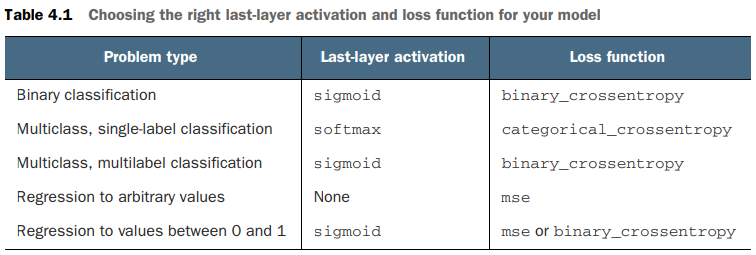

# One-Hot-Encode
One-hot-encode the arrays to convert them into vectors of 0s and 1s. For example, the sequence [3, 5] would become a 10,000-dimensional vector that is all zeros except for indices 3 and 5, which are ones. Then, make this the first layer in our network—a Dense layer—that can handle floating point vector data. This approach is memory intensive, though, requiring a num_words * num_reviews size matrix.

# Padding
Pad the arrays so they all have the same length, then create an integer tensor of shape max_length * num_reviews. We can use an embedding layer capable of handling this shape as the first layer in our network.

# Information bottleneck
In a stack of Dense layers like that you’ve been using, each layer can only access information present in the output of the previous layer. If one layer drops some information relevant to the classification problem, this information can never be recovered by later layers: each layer can potentially become an information bottleneck. In the previous example, you used 16-dimensional intermediate layers, but a 16-dimensional space may be too limited to learn to separate 46 different classes: such small layers may act as information bottlenecks, permanently dropping relevant information.

# Softmax
The last layer uses a softmax activation, it means that the network will output a probability distribution over the 46 different output classes—for every input sample, the network will produce a 46-dimensional output vector, where output[i] is the probability that the sample belongs to class i. The 46 scores will sum to 1.

# Scalar Regression

- Regression is done using different loss functions than what we used for classification. Mean squared error (MSE) is a loss function commonly used for regression.
- Similarly, evaluation metrics to be used for regression differ from those used for classification; naturally, the concept of accuracy doesn’t apply for regression. A common regression metric is mean absolute error (MAE).
- When features in the input data have values in different ranges, each feature should be scaled independently as a preprocessing step.
- When there is little data available, using K-fold validation is a great way to reliably evaluate a model.
- When little training data is available, it’s preferable to use a small network with few hidden layers (typically only one or two), in order to avoid severe overfitting.

# Feature-wise normalization

- Feature-wise normalization: for each feature in the input data (a column in the input data matrix), you subtract the mean of the feature and divide by the standard deviation, so that the feature is centered around 0 and has a unit standard deviation.
- https://towardsdatascience.com/the-surprising-longevity-of-the-z-score-a8d4f65f64a0 
- The Standard Deviation is a measure of how spread out numbers are:
    - Step 1: Find the mean.
    - Step 2: For each data point, find the square of its distance to the mean.
    - Step 3: Sum the values from Step 2.
    - Step 4: Divide by the number of data points.
    - Step 5: Take the square root.
- Quantities used for normalizing the test data are computed using the training data. You should never use in your workflow any quantity computed on the test data, even for something as simple as data normalization.

# K-fold Validation

- Splitting the available data into K partitions (typically K = 4 or 5), instantiating K identical models, and training each one on K – 1 partitions while evaluating on the remaining partition. The validation score for the model used is then the average of the K validation scores obtained.
- https://medium.com/datadriveninvestor/k-fold-cross-validation-6b8518070833

# Regularization 

Many strategies used in machine learning are explicitly designed to reduce the test error, possibly at the expense of increased training error. Generally, regularization is any modification we make to a learning algorithm that is intended to reduce its generalization error but not its training error.

The L2 parameter norm penalty commonly known as Weight decay is one of the simplest and most common kinds of regularization technique which forces the weights to become smaller, by adding a parameter norm penalty to the objective function. For example, in linear regression, this gives us solutions that have a smaller slope, or put weight on fewer of the features. In other words, even though the model is capable of representing functions with much more complicated shape, weight decay has encouraged it to use a simpler function described by smaller coefficients.

Intuitively, in the feature space, only directions along which the parameters contribute significantly to reducing the objective function are preserved relatively intact. In directions that do not contribute to reducing the objective function, movement in this direction will not significantly increase the gradient.So, Components of the weight vector corresponding to such unimportant directions are decayed away through the use of the regularization throughout training.

Another simple explanation is when your weights are large, they are more sensitive to small noises in the input data. So, when a small noise is propagated through your network with large weights, it produces much different value in the output layer of the NN rather than a network with small weights.

Note that weight decay is not the only regularization technique. In the past few years, some other approaches have been introduced such as Dropout, Bagging, Early Stop, and Parameter Sharing which work very well in NNs.

# Dropout

I went to my bank. The tellers kept changing and I asked one of them why. He said he didn’t know but they got moved around a lot. I figured it must be because it would require cooperation between employees to successfully defraud the bank. This made me realize that randomly removing a different subset of neurons on each example would prevent conspiracies and thus reduce overfitting

At every iteration, it randomly selects some nodes and removes them along with all of their incoming and outgoing connections as shown below. So each iteration has a different set of nodes and this results in a different set of outputs. It can also be thought of as an ensemble technique in machine learning.

At test time, no units are dropped out; instead, the layer’s output values are scaled down by a factor equal to the dropout rate, to balance for the fact that more units are active than at training time.

Deep neural nets with a large number of parameters are very powerful machine learning systems. However, overfitting is a serious problem in such networks. Large networks are also slow to use, making it difficult to deal with overfitting by combining the predictions of many different large neural nets at test time. Dropout is a technique for addressing this problem. The key idea is to randomly drop units (along with their connections) from the neural network during training. This prevents units from co-adapting too much. During training, dropout samples from an exponential number of different “thinned” networks. At test time, it is easy to approximate the effect of averaging the predictions of all these thinned networks by simply using a single unthinned network that has smaller weights. This significantly reduces overfitting and gives major improvements over other regularization methods. We show that dropout improves the performance of neural networks on supervised learning tasks in vision, speech recognition, document classification and computational biology, obtaining state-of-the-art results on many benchmark data sets.

In a standard neural network, the derivative received by each parameter tells it how it should change so the final loss function is reduced, given what all other units are doing. Therefore, units may change in a way that they fix up the mistakes of the other units. This may lead to complex co-adaptations. This in turn leads to overfitting because these co-adaptations do not generalize to unseen data. We hypothesize that for each hidden unit, dropout prevents co-adaptation by making the presence of other hidden units unreliable. Therefore, a hidden unit cannot rely on other specific units to correct its mistakes. It must perform well in a wide variety of different contexts provided by the other hidden units. To observe this effect directly, we look at the first level features learned by neural networks trained on visual tasks with and without dropout.